# Importing Libraries

In [2]:
# generel utility libraries
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

#svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#scale
from sklearn.preprocessing import StandardScaler

#pca
from sklearn.decomposition import PCA

#pipeline
from sklearn.pipeline import make_pipeline, Pipeline

# Importing Data

In [3]:
train_data = scipy.io.loadmat('mnist_training_data.mat')
train_label = scipy.io.loadmat('mnist_training_label.mat')
print(train_label.keys())
print(train_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'training_label'])
dict_keys(['__header__', '__version__', '__globals__', 'training_data'])


In [4]:
test_data = scipy.io.loadmat('mnist_test_data.mat')
test_label = scipy.io.loadmat('mnist_test_label.mat')
print(test_label.keys())
print(test_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'test_label'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])


In [5]:
X_train = train_data['training_data']
y_train = train_label['training_label'].reshape(-1,)
print(X_train.shape)
print(y_train.shape)

(50000, 784)
(50000,)


In [6]:
X_test = test_data['test_data']
y_test = test_label['test_label'].reshape(-1,)
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


# Visualization of Data

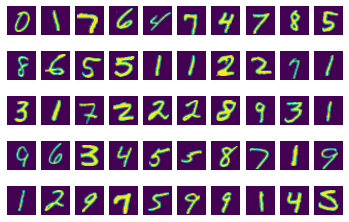

In [7]:
suffle_index=np.random.permutation(range(50000))
j=1
for i in suffle_index[:50]:
    plt.subplot(5,10,j)
    j+=1
    plt.axis('off')
    plt.imshow(X_train[i].reshape(28,28))

# Building Model and Accuracy on Unrotated Data

In [8]:
svm = make_pipeline( 
    SVC()
)

svm.fit(X_train, y_train)
acc = svm.score(X_test, y_test)
print(f"Accuracy usnig SVM is {acc:.2%}")

Accuracy usnig SVM is 97.88%


# Importing Rotated Data for Testing

In [9]:
test_data_rotated = scipy.io.loadmat('mnist-rot_test_data.mat')
test_label_rotated = scipy.io.loadmat('mnist-rot_test_label.mat')
print(test_label_rotated.keys())
print(test_data_rotated.keys())

dict_keys(['__header__', '__version__', '__globals__', 'test_label'])
dict_keys(['__header__', '__version__', '__globals__', 'test_data'])


In [10]:
X_test_rotated = test_data_rotated['test_data']
y_test_rotated = np.array(test_label_rotated['test_label']).reshape(-1,)
print(X_test_rotated.shape)
print(y_test_rotated.shape)

(10000, 28, 28)
(10000,)


# Accuracy on Rotated data

In [12]:
acc_1 = svm.score(X_test_rotated.reshape(10000,-1), y_test_rotated)
print(f"Accuracy on Rotated data on this model is {acc_1:.2%}")

Accuracy on Rotated data on this model is 9.96%


# Applying PCA

In [13]:
svm_pca = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.90), 
    SVC()
)

svm_pca.fit(X_train, y_train)
acc_pca = svm_pca.score(X_test, y_test)
print(f"Accuracy usnig SVM after Dimension Reduction is {acc_pca:.2%}")

Accuracy usnig SVM after Dimension Reduction is 96.85%


# Accuracy on Rotated data applying PCA

In [15]:
acc_pca_rotated = svm_pca.score(X_test_rotated.reshape(10000,-1), y_test_rotated)
print(f"Accuracy on Rotated data after Dimension Reduction is {acc_pca_rotated:.2%}")

Accuracy on Rotated data after Dimension Reduction is 10.56%
